# Projeto de Férias - Aprendizado de Máquina
-----------------------

# Predição de emissão de gases em um dataset sobre turbinas 

**Aluno:** Enzo J. Xavier - RM 24035

**Orientador:** Dr. Daniel Roberto Cassar

## Introdução:

Após todo o procedimento de pré-processamento dos dados, retirados de uma turbina à gás [1] e discutido no arquivo anterior [Introdução](https://github.com/CassarGroup/Enzo-Januzzi---Redes-Neurais/blob/main/Projeto/Introdução.ipynb), chegou a etapa de desenvolver e treinar um modelo de Aprendizado de Máquina para prever de fato essas emissões. Escolheu-se um modelo de Redes Neurais Recorrentes (RNN, *Recurrent Neural Network* em inglês) do tipo **LSTM** (*Long-Short Term Memory*, ou Memória de Curto e Longo Prazo), cuja arquitetura permite classificar, processar e prever séries temporais [2]. A fim de entender melhor esse algoritmo, será explicado um modelo base, mais simples e com parâmetros parecidos - as Redes Neurais, mais especificamente um Perceptron Multicamadas(MLP, *Multilayer Perceptron* do inglês).

A métrica de erro usada é a Raiz do Erro Quadrático Médio **RMSE**, a qual calcula a raiz da média de diferença entre o valor predito com o real, penalizando grandes diferenças entre os valores (os chamados *outliers*). 

$$RMSE(y,ŷ) = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - ŷ_i)^2}
\tag{0}$$

Em que $y$ é o valor real, $ŷ$ é o valor predito e $n$ é o número de exemplos

### MLP:

Uma MLP simula uma rede neural humana por ser dividida em 3 tipos (camada de entrada, camada oculta e camada de sáida), as quais são conectadas por sinapes e a informação passa por cada unidade, chamada de "neurônio". A transmissão dos dados considera 2 parâmetros próprios de cada neurônio: o **peso** (*weight*, em tradução livre), que representa a relevância da informação, e o **viés** (em inglês *bias*), sendo um valor intrínseco indicativo se os dados serão passados adiante na rede.

![](https://ars.els-cdn.com/content/image/1-s2.0-S2590005622000339-gr1_lrg.jpg)

**Figura 1:** Esquema de uma MLP simples, com 3 camadas totais. Os números ilustram a posição dos neurônios, sendo que o termo $\omega$ indica o peso passado para as camadas seguintes e o termo $\beta$ representa o viés adicionado à cada neurônio. Imagem de M.G. Rojas *et al* [3].

Esse modelo também possui uma **função de ativação**, responsável por modificar o resultado das operações matemáticas aplicadas aos dados, garantindo uma padronização dos valores de saída, ou outputs. Dentre as funções usadas estão a sigmoide ($\sigma$), a qual converte os resultados em um intervalo entre 0 e 1, e a tangente hiperpólica (tanh), cujo intervalo varia entre -1 e 1. Abaixo estão as principais fórmulas por trás do algoritmo:

$$\sigma(x) = \frac{1}{1 + e^{-x}} \tag{1}$$ 

$$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \tag{2}$$ 

$$y = f((\sum_{i=1}^{n} w_i \cdot x_i) + b) \tag{3}$$

Em que $e$ é o número de Euler, $w_i$ é o peso na posição *i*, $x_i$ é o input na posição *i*, $b$ é o viés somado e $y$ é o output passado à próxima camada ou o dado de saída.

Ao fornecer os atributos do problema como os dados de entrada, o modelo aleatoriza o valor de todos os seus parâmetros (i.e, $w$ e $b$), calculando um valor de saída que deve ser aproximado ao valor real predito (target). O output final do modelo chama-se **função perda**, o qual mede a ácurácia do algoritmo e deve ser minimizado, indicando estar próximo da previsão. Para isso, ele usa a **backpropagation** (retro-propagação, em português), que consiste em calcular os gradientes da função perda com respeito à cada parâmetro do sistema, cujo passo a passo (ou **step**) envolve mudar ligeiramente os pesos e viéses e recalcular o output, visando reduzir seu valor.

A introdução teórica teve como base o excelente vídeo de Andrej Karpathy, que ensina os fundamentos de uma rede neural criando do zero a biblioteca *Micrograd*. [4]

### RNN:

A vantagem das redes recorrentes em relação à rede anterior é que elas permitem lidar com dados dependentes do tempo, cuja ordem dos exemplos importa na implementação do modelo. Em linhas gerais, a mudança consiste em "desenrolar" a rede neural duplicando a arquitetura para o número de exemplos dados, sendo que o peso de um dado no instante $t$ é passado como informação em conjunto com o dado sequencial em $t + 1$.

![Fig 2 - RNN.png](<attachment:Fig 2 - RNN.png>)
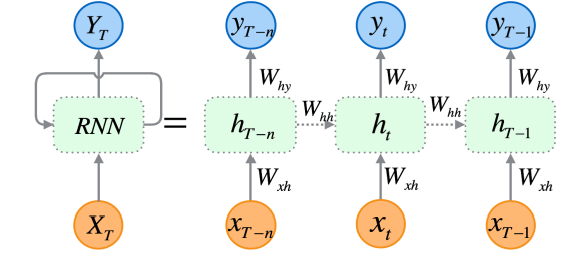

**Figura 2:** RNN Uma rede neuronal recorrente (RNN) é uma classe de redes neuronais artificiais em que as ligações entre os nós formam um grafo dirigido ao longo de uma sequência temporal. Isto permite-lhe apresentar um comportamento dinâmico temporal. Derivadas das redes neuronais *feed forward*, as RNN podem utilizar o seu estado interno (memória) para processar sequências de entradas de comprimento variável. Ilustração e legenda feitos por Rishikesh Gawde [5]

Pela imagem, percebe-se que cada entrada possui uma dependência temporal, compartilhando os mesmos pesos: $W_xh$ é o peso entre o input $X$ e a célula oculta $h$, $W_hy$ é passando da função de ativação da célula oculta para o dado de saída $Y$, e $W_hh$ é o peso distribuído entre as camadas ocultas consecutivas. O modelo estima os outputs pelo mesmo processo de *backpropagation*, no entanto, uma limitação das RNN padrão é o chamado **Vanishing Exploding Gradient Problem**, ou Problema do Gradiente Explodindo e Desaparecendo.

- Caso o módulo do peso $W_hh$ seja maior que 1, quanto mais exemplos iniciais $n$, mais o output final é multiplicado $n$ vezes. Ao tornar o valor do gradiente extremamente maior, isso prejudica minimizar a função perda 

- Caso o módulo do peso $W_hh$ seja menor que 1, quanto mais exemplos iniciais, mais o output final é multiplicado por um número próximo de 0, tornando o valor do gradiente extremamente menor. Isso dificulta para a resposta convergir, resultando em um mínimo local sub-ótimo

O funcionamento do algoritmo é bem explicado pelo vídeo do *Statquest*, no qual há boas ilustrações e uma visão geral das RNNs [6] 

### LSTM:

A alternativa ao problema mencionado pode ser uma rede neural recorrente com memória de longo e curto prazo. Esse modelo é mais complexo, contendo 2 unidades de memória - **Cell State**, ou Estado de Célula, e **Hidden State**, ou Estado Oculto -, 2 funções de ativação - Sigmoide e *Tanh* - e dividido em 3 partes: **Forget Gate** (Portão do Esquecimento, em português), **Input Gate** (Portão de Entrada, em português), e **Output Gate** (Portão de Saída, em português). 

![](https://www.mdpi.com/energies/energies-10-01168/article_deploy/html/images/energies-10-01168-g008.png)

**Figura 3:** Arquitetura de um bloco de memória LSTM, retirada de um artigo [7]. Seu funcionamento é explicado abaixo.

#### Forget Gate:

No caminho *Forget Gate* ($f_t$), a informação do input $X_t$ passa em conjunto com a da memória de curto prazo $h_{t-1}$ (*h* de *hidden state*), com ambos contendo seus respectivos pesos e o mesmo viés. A função sigmoide $\sigma$ é aplicada ao resultado e multiplicada com a memória de longo prazo $C_t-1$, indicando a porcentagem desta a ser lembrada.


$$ f_t = \sigma(W_{xf} \cdot x^{(t)} + W_{hf} \cdot h^{(t-1)} + b_f) 
\tag{4} $$


As fórmulas mencionadas são exploradas no livro de Sebastian Raschka [8]. $W_{xf}$ é o peso correspondente ao dado de entrada, $W_{hf}$ é o peso relativo ao estado oculto e $b_f$ é o viés.

#### Input Gate:

No caminho *Input Gate* ($i_t$) ocorre a atualização da memória de longo prazo. Primeiro, é computado o **Valor Candidato** ($\tilde{C}_t$, ou *Candidate Value*) usando a função *tanh* de modo similar ao cálculo de $f_t$, representando um possível *estado de célula*. Em seguida, calcula-se a porcentagem desse candidato a atualizar a memória de longo prazo de maneira idêntica em (4), somando à memória existente.


$$ i_t = \sigma(W_{xi} \cdot x^{(t)} + W_{hi} \cdot h^{(t-1)} + b_i) 
\tag{5} $$

$$ \tilde{C}_t = tanh(W_{xc} \cdot x^{(t)} + W_{hc} \cdot h^{(t-1)} + b_c) 
\tag{6} $$

O *Cell State* no instante t é calculado abaixo:
$$ C^{(t)} = (C^{(t-1)} \cdot f_t) + (i_t \cdot \tilde{C}_t) 
\tag{7} $$

Em que $W_{xi}$, $W_{hi}$, $W_{xc}$ e $W_{hc}$ são, respectivamente, os pesos do input para o portão de entrada, do estado oculto para o portão de entrada, do input para o valor candidato e do estado oculto para o valor candidato. $b_i$ e $b_c$ são os vieses no *input gate* e no *candidate value*.

#### Output Gate:

No caminho *Output Gate* ($o_t$), há a modificação da memória de curto prazo, a qual é o dado de saída de toda a unidade do LSTM. O método é parecido com o explicado nos portões prévios: combinam-se o input, o estado oculto e o viés, com seus pesos, aplicando-os à função sigmoide. Por fim, a porcentagem do *hidden state* é multiplicada com a tangente hiperbólica do *cell state* mais recente.


$$ o_t = \sigma(W_{xo} \cdot x^{(t)} + W_{ho} \cdot h^{(t-1)} + b_o) 
\tag{8} $$

$$ h^{(t)} = o_t \cdot tanh(C^{(t)})
\tag{9} $$


$W_{xo}$ é o peso do input, $W_{ho}$ é o do estado oculto e $b_o $ é o viés, assim como nas últimas etapas. O material também foi baseado em outro vídeo do *Statquest* [9]

## Importações e definições:

Importando as principais bibliotecas usadas neste notebok. A documentação de cada biblioteca se encontra no final do arquivo, na sessão "Referências" [10-17]

In [50]:
# Geral
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Modelos
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import lightning as L

Criando classes específicas baseadas nas bibliotecas dos modelos *Torch* e *Lightning*. A primeira permite criar datasets com sequências contendo os atributos da turbina e os targets esperados para cada medida, sendo que cada medida representa um **exemplo** ou **batch** do dataset completo, o que agiliza o treinamento ao fazer backpropagation pelos batches, e não com todos os dados. 

A segunda agrupa todas as etapas relacionadas ao pré-processamento e elaboração dos datasets para cada etapa do treinamento, incluindo o carregamento dos datasets, a normalização dos dados e a definição dos *exemplos*. Essa classe explicita os métodos e funções empregados, organizando melhor os dados.

In [17]:
class TempDataset(Dataset):
    """Ajuda a criar um dataset com os batches de treinamento"""
    def __init__(self, sequencias):
        self.sequencias = sequencias

    def __len__(self):
        return len(self.sequencias)

    def __getitem__(self, idx):
        sequencia, target = self.sequencias[idx]
        return torch.FloatTensor(sequencia), torch.FloatTensor(target)

In [18]:
class DataModule(L.LightningDataModule):
    """Módulo padrão para lidar com todas as etapas do dataset, incluindo o 
    pré-processamento dos dados e a divisão dos datasets"""

    def __init__(self):
        # Constantes
        super().__init__()
        self.ATRIBUTOS = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP']  
        self.TARGET = ['CO', 'NOX']  
        self.TAMANHO_SEQUENCIA = 20
        self.TAMANHO_LOTE = 128

        # Funções
        self.definicoes()
        self.pre_processing()

    def definicoes(self):
        # Diretório
        atual = os.getcwd()
        caminho = os.path.dirname(atual)
        os.chdir(f'{caminho}\\Datasets')

        # Carregar datasets
        df_2011 = pd.read_csv('gt_2011.csv')
        df_2012 = pd.read_csv('gt_2012.csv')
        df_2013 = pd.read_csv('gt_2013.csv')
        df_2014 = pd.read_csv('gt_2014.csv')
        df_2015 = pd.read_csv('gt_2015.csv')

        # Dividir datasets
        self.df_treino = pd.concat([df_2011,df_2012], ignore_index= True)
        self.df_val = df_2013
        self.df_teste = pd.concat([df_2014,df_2015], ignore_index= True)
        self.df_tot = pd.concat([df_2011,df_2012,df_2013,df_2014,df_2015], ignore_index= True)

    def pre_processing(self):
        # Organizar e normalizar dados
        self.X_treino = self.df_treino.reindex(self.ATRIBUTOS, axis=1).values
        self.y_treino = self.df_treino.reindex(self.TARGET, axis=1).values

        self.x_scaler = StandardScaler()
        self.x_scaler.fit(self.X_treino)
        self.y_scaler = StandardScaler()  
        self.y_scaler.fit(self.y_treino)                                 

    def setup(self, stage):
        """Aqui deve-se alterar o estado da classe para adicionar as informações 
        referentes aos conjuntos de treino, teste e validação. O argumento `stage` 
        indica em qual estágio o processo de treino está 
        (pode ser `fit` para treinamento/validação e `test` para teste).

        É nesta etapa onde aplica-setransformações aos dados caso necessário."""

        def cria_sequencias(data_x, data_y, tamanho_sequencia):
            '''Divide o dataset em exemplos (batches) para o treinamento do LSTM'''
            sequencias = []

            for i in range(len(data_x) - tamanho_sequencia):
                sequencia_x = data_x[i : i + tamanho_sequencia]
                target_y = data_y[i + tamanho_sequencia]
                sequencias.append((sequencia_x, target_y))

            return sequencias

        # Controlar modo de operação
        if stage == "fit":
            # Treino
            self.X_treino_norm = self.x_scaler.transform(self.X_treino)
            self.y_treino_norm = self.y_scaler.transform(self.y_treino)
            
            self.seq_treino = cria_sequencias(self.X_treino_norm, self.y_treino_norm, self.TAMANHO_SEQUENCIA)
            self.X_treino_norm = torch.tensor(self.X_treino_norm, dtype=torch.float32)
            self.y_treino_norm = torch.tensor(self.y_treino_norm, dtype=torch.float32)

            # Validação
            self.X_val = self.df_val.reindex(self.ATRIBUTOS, axis=1).values
            self.y_val = self.df_val.reindex(self.TARGET, axis=1).values
            self.X_val_norm = self.x_scaler.transform(self.X_val)
            self.y_val_norm = self.y_scaler.transform(self.y_val)
            
            self.seq_val = cria_sequencias(self.X_val_norm, self.y_val_norm, self.TAMANHO_SEQUENCIA)
            self.X_val_norm = torch.tensor(self.X_val_norm, dtype=torch.float32)
            self.y_val_norm = torch.tensor(self.y_val_norm, dtype=torch.float32)
        if stage == "test":
            # Teste
            self.X_teste = self.df_teste.reindex(self.ATRIBUTOS, axis=1).values
            self.y_teste = self.df_teste.reindex(self.TARGET, axis=1).values
            self.X_teste_norm = self.x_scaler.transform(self.X_teste)
            self.y_teste_norm = self.y_scaler.transform(self.y_teste)

            self.seq_teste = cria_sequencias(self.X_teste_norm, self.y_teste_norm, self.TAMANHO_SEQUENCIA)
            self.X_teste_norm = torch.tensor(self.X_teste_norm, dtype=torch.float32)
            self.y_teste_norm = torch.tensor(self.y_teste_norm, dtype=torch.float32)

    def train_dataloader(self):
        self.dataset_treino = TempDataset(self.seq_treino)
        self.dataloader_treino = DataLoader(
            self.dataset_treino, batch_size=self.TAMANHO_LOTE, shuffle=False)
        return self.dataloader_treino

    def val_dataloader(self):
        self.dataset_val = TempDataset(self.seq_val)
        self.dataloader_val = DataLoader(
            self.dataset_val, batch_size=self.TAMANHO_LOTE, shuffle=False)
        return self.dataloader_val

    def test_dataloader(self):
        self.dataset_teste = TempDataset(self.seq_teste)
        self.dataloader_teste = DataLoader(
            self.dataset_teste, batch_size=self.TAMANHO_LOTE, shuffle=False)
        return self.dataloader_teste

In [123]:
dm.df_teste

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499
...,...,...,...,...,...,...,...,...,...,...,...
14537,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
14538,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
14539,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
14540,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


In [126]:
dm.df_teste[188:]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
188,9.4265,1017.9,98.940,3.0128,18.964,1016.7,533.44,103.20,10.111,19.7030,104.280
189,8.9473,1017.8,100.080,3.0950,19.007,1032.6,543.80,105.99,10.111,8.5779,97.390
190,9.0339,1017.4,100.080,3.1455,18.892,1030.2,542.53,104.73,10.097,8.7896,105.540
191,9.4605,1017.2,100.080,3.1738,18.791,1035.6,546.65,105.12,10.230,6.8984,101.470
192,9.3760,1017.3,100.080,3.2148,18.879,1036.2,546.54,105.62,10.282,6.5038,96.624
...,...,...,...,...,...,...,...,...,...,...,...
14537,3.6268,1028.5,93.200,3.1661,19.087,1037.0,541.59,109.08,10.411,10.9930,89.172
14538,4.1674,1028.6,94.036,3.1923,19.016,1037.6,542.28,108.79,10.344,11.1440,88.849
14539,5.4820,1028.5,95.219,3.3128,18.857,1038.0,543.48,107.81,10.462,11.4140,96.147
14540,5.8837,1028.7,94.200,3.9831,23.563,1076.9,550.11,131.41,11.771,3.3134,64.738


## Treinamento do modelo:

Criando a classe principal, em que se define o modelo, transformação, tipo de função perda, otimizador, passos de cada etapa e a curva de aprendizado característica. A transformação padrão é a linear, a função perda será o erro quadrático médio (MSE), o **otimizador** é o *Adam* e ajuda a melhorar a etapa do *step*, e a **curva de aprendizado** é um gráfico que permite visualizar a perda ao longo do tempo, comparando os dados de teste e de validação.

* Nota: Algumas funções foram baseadas ou adaptadas de materiais feitos pelo Daniel Cassar [18-22], bem como de conversas com o Gemini [23].

In [19]:
class TimeSeriesModel(L.LightningModule):
    """Modelo LSTM adaptado, contendo a propagação, os steps e as épocas"""
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()

        self.lstm = torch.nn.LSTM(num_inputs, num_hidden, batch_first=True)
        self.fc = torch.nn.Linear(num_hidden, num_outputs) 
        self.loss = F.mse_loss

        # Curva de aprendizado
        self.perdas_treino = []
        self.perdas_val = []

        self.curva_aprendizado_treino = []
        self.curva_aprendizado_val = []

    def forward(self, x):
        _, (hidden, _) = self.lstm(x)
        return self.fc(hidden[-1])

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=0.01)
        return optimizer

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = self.loss(y, y_pred)

        self.log("train_loss", loss, prog_bar=True)
        self.perdas_treino.append(loss)

        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = self.loss(y, y_pred)

        self.log("val_loss", loss, prog_bar=True)
        self.perdas_val.append(loss)

        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = self.loss(y, y_pred)

        self.log("test_loss", loss)

        return loss

    def on_train_epoch_end(self):
        # Atualiza curva de aprendizado treino
        perda_media = torch.stack(self.perdas_treino).mean()
        self.curva_aprendizado_treino.append(float(perda_media))
        self.perdas_treino.clear()

    def on_validation_epoch_end(self):
        # Atualiza curva de aprendizado validação
        perda_media = torch.stack(self.perdas_val).mean()
        self.curva_aprendizado_val.append(float(perda_media))
        self.perdas_val.clear()

Definindo uma instância de treinamento contendo o número de épocas desejado para ajustar a rede neural ao dataset. **Época** é o número de vezes que ocorre o laço do *step*, em que calcula-se os gradientes e faz-se o *backpropagation*, ajustando os parâmetros. Essa instância também indica qual unidade de processamento está disponível para usar além do CPU, caso haja.

In [20]:
NUM_EPOCAS = 20
treinador = L.Trainer(max_epochs=NUM_EPOCAS)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Relembrando os atributos e alvos do problema, bem como instanciando a classe *DataModule*:

In [21]:
ATRIBUTOS = ['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP']
TARGET = ['CO', 'NOX']

dm = DataModule()

Instanciando o modelo com o número de inputs, outputs e com 3 camadas ocultas:

In [22]:
num_inputs = len(ATRIBUTOS)
num_hidden = 3
num_outputs = len(TARGET)

modelo = TimeSeriesModel(
    num_inputs, num_hidden, num_outputs
)

Ajustando o modelo aos dados. Para isso, define-se o modo "fit" no método *setup* e aplica-se o método *fit* do treinador, indicando que a rede está na etapa de treinamento.

In [23]:
dm.setup('fit')
treinador.fit(modelo, dm)


  | Name | Type   | Params | Mode 
----------------------------------------
0 | lstm | LSTM   | 168    | train
1 | fc   | Linear | 8      | train
----------------------------------------
176       Trainable params
0         Non-trainable params
176       Total params
0.001     Total estimated model params size (MB)
2         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\venv\ilumpy\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
c:\venv\ilumpy\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


Criando a curva de aprendizado contendo o erro a cada época na etapa de treino e de validação:

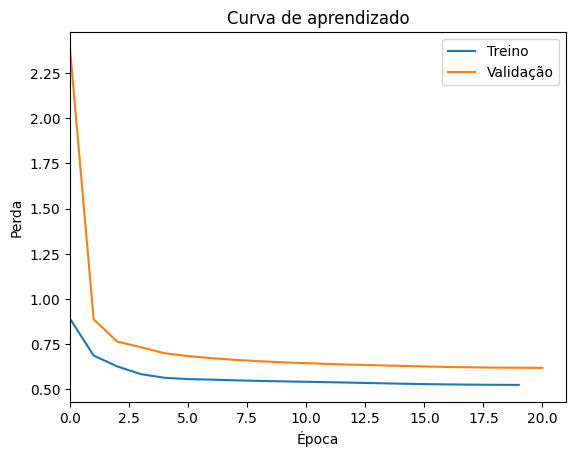

In [24]:
ca_treino = modelo.curva_aprendizado_treino
ca_val = modelo.curva_aprendizado_val

sns.lineplot(ca_treino, label="Treino")
eixo = sns.lineplot(ca_val, label="Validação")

eixo.set_xlim(left=0)

eixo.set_title("Curva de aprendizado")
eixo.set_xlabel("Época")
eixo.set_ylabel("Perda");

É interessante notar que como os parâmetros são aleatorizados inicialmente ao instanciar o modelo, cada vez que houver o treinamento a perda poderá ser diferente. No entanto, para analisar esse gráfico deve-se considerar alguns fatores: a partir de qual época a perda se estabiliza (evitando ter muitas épocas consumindo recursos computacionais), se a curva de validação sobe muito (indicando um possível sobreajuste dos dados), se houve poucas épocas (indicando um possível subajuste dos dados) e se a perda vai diminuindo a cada época.

Deixando o modelo no modo de teste, através do método *eval*:

In [25]:
modelo.eval()

TimeSeriesModel(
  (lstm): LSTM(9, 3, batch_first=True)
  (fc): Linear(in_features=3, out_features=2, bias=True)
)

Deixando o datamodule no modo de teste, além de calcular os targets reais e preditos pelo algoritmo no dataloader de teste. Nessa etapa as contas ficam no ambiente *torch.no_grad*, indicando que não é mais necessário computar os gradientes para os parâmetros do modelo.

In [103]:
dm.setup('test')
dataloader_teste = dm.test_dataloader()

with torch.no_grad():
    y_pred_norm = []
    y_true_norm = []

    for atributo, target in dataloader_teste:
        previsao = modelo(atributo)
        
        for i in range(len(previsao)): # len(previsao) == dm.TAMANHO_LOTE

            y_pred_co_norm = previsao[i][0].item()
            y_pred_nox_norm = previsao[i][1].item()
            y_pred_norm.append([y_pred_co_norm, y_pred_nox_norm])

            y_true_co_norm = target[i][0].item()
            y_true_nox_norm = target[i][1].item()
            y_true_norm.append([y_true_co_norm, y_true_nox_norm])

Por fim, convertendo os alvos na escala original (desnormalizada) e calculando a raiz do erro quadrático médio (RMSE), representando a eficácia do modelo:

In [106]:
y_pred = dm.y_scaler.inverse_transform(np.array(y_pred_norm).reshape(-1, 2))
y_true = dm.y_scaler.inverse_transform(np.array(y_true_norm).reshape(-1, 2))

RMSE_co = mean_squared_error(y_pred[:, 0], y_true[:, 0]) ** (1/2)
RMSE_nox = mean_squared_error(y_pred[:, 1], y_true[:, 1]) ** (1/2)

print(f'O RMSE para o CO foi de {round(RMSE_co,2)} mg/m³')
print(f'O RMSE para o NOX foi de {round(RMSE_nox,2)} mg/m³')

O RMSE para o CO foi de 1.82 mg/m³
O RMSE para o NOX foi de 11.58 mg/m³


A eficiência da previsão para o CO foi evidentemente maior que a do NOX, o que é justificado pelos gráficos plotados no arquivo [Introdução](https://github.com/CassarGroup/Enzo-Januzzi---Redes-Neurais/blob/main/Projeto/Introdução.ipynb), nos quais a concentração do primeiro gás é mais próxima de valores pequenos, enquanto a do segundo é mais espalhada em valores medianos.

Fazendo um gráfico para comparar o valor real e predito de cada gás. Para o CO escolheu-se um intervalo de tempo entre 100 e 200 horas, a fim de visualizar melhor:

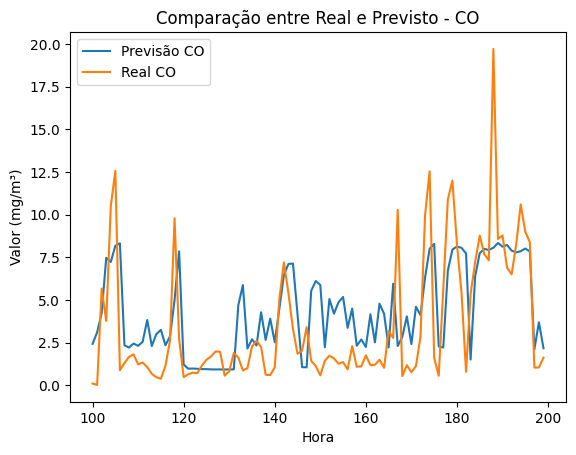

In [130]:
# Definições
co_pred = y_pred[:, 0]
co_true = y_true[:, 0]
tamanho_sequencia = dm.TAMANHO_SEQUENCIA
horas = np.arange(tamanho_sequencia, len(dm.df_teste))

# Selecionar o intervalo (exemplo: hora 50 a 100)
intervalo_inicio = 100
intervalo_fim = 200
co_pred_intervalo = co_pred[intervalo_inicio - tamanho_sequencia:intervalo_fim - tamanho_sequencia]
co_true_intervalo = co_true[intervalo_inicio - tamanho_sequencia:intervalo_fim - tamanho_sequencia]
horas_intervalo = horas[intervalo_inicio - tamanho_sequencia:intervalo_fim - tamanho_sequencia]

# Gráfico
plt.plot(horas_intervalo, co_pred_intervalo, label = 'Previsão CO')
plt.plot(horas_intervalo, co_true_intervalo, label = 'Real CO')

plt.xlabel('Hora')
plt.ylabel('Valor (mg/m³)')
plt.title('Comparação entre Real e Previsto - CO')
plt.legend()

plt.show()

Percebe-se que o modelo tenta se ajustar aos dados, adaptando-se bem mesmo com a alta variação dos valores reais. Fazendo para o NOX com um período entre 400 e 500:

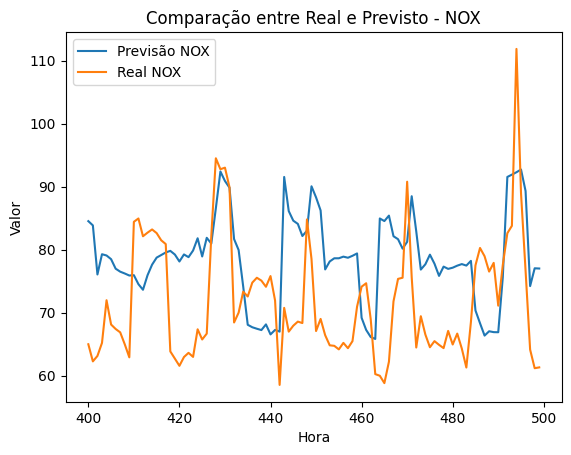

In [141]:
# Definições
nox_pred = y_pred[:, 1]
nox_true = y_true[:, 1]

# Intervalo
intervalo_inicio = 400
intervalo_fim = 500
nox_pred_intervalo = nox_pred[intervalo_inicio - tamanho_sequencia:intervalo_fim - tamanho_sequencia]
nox_true_intervalo = nox_true[intervalo_inicio - tamanho_sequencia:intervalo_fim - tamanho_sequencia]
horas_intervalo = horas[intervalo_inicio - tamanho_sequencia:intervalo_fim - tamanho_sequencia]

# Gráfico NOX
plt.plot(horas_intervalo, nox_pred_intervalo, label = 'Previsão NOX')
plt.plot(horas_intervalo, nox_true_intervalo, label = 'Real NOX')
plt.xlabel('Hora')
plt.ylabel('Valor')
plt.title('Comparação entre Real e Previsto - NOX')
plt.legend()
plt.show()

Para esse período, nota-se que embora as previsões estejam perto do valor real, o modelo enfrenta dificuldades de se aproximar mais dos dados para o NOX, o que é evidenciado pelo alto RMSE desse gás do algoritmo

## Conclusão:

Foi possível treinar um modelo complexo de Redes Neurais Recorrentes e fazer previsões sobre as emissões de gases da turbina estudada. Cabe ressaltar que ainda podem ser feitas melhorias não abordadas, como fazer uma regularização L2 no pré-processamento, calcular outras métricas de erro (MAE, R²), comparar as previsões com outros modelos e variar os hiperparâmetros do algoritmo, o que traria um resultado mais abrangente.

## Referências:

[1] Gas Turbine CO and NOx Emission Data Set. 2019. UCI Machine Learning Repository. https://doi.org/10.24432/C5WC95.

[2] Material sobre LSTM. 2022. Data Science Academy. https://www.deeplearningbook.com.br/arquitetura-de-redes-neurais-long-short-term-memory/

[3] ROJAS, Matías Gabriel *et al*. 2022. "Optimising Multilayer Perceptron Weights and Biases Through a Cellular Genetic Algorithm for Medical Data Classification." Array 14: 100173. https://doi.org/10.1016/j.array.2022.100173.

[4] KARPATHY, Andrej. "The spelled-out intro to neural networks and backpropagation: building micrograd". YouTube. https://youtu.be/VMj-3S1tku0.

[5] GAWDE, Rishikesh. Image Caption Generation Methodologies - Scientific Figure on ResearchGate. Disponível em: https://www.researchgate.net/figure/Fig-3-RNN-A-recurrent-neural-network-RNN-is-a-class-of-artificial-neural-networks_fig1_351840108.

[6] STARMER, Josh. "Recurrent Neural Networks (RNNs), Clearly Explained!!!". Youtube. https://www.youtube.com/watch?v=AsNTP8Kwu80

[7] Zheng, Huiting, Jiabin Yuan, and Long Chen. "Short-Term Load Forecasting Using EMD-LSTM Neural Networks with a Xgboost Algorithm for Feature Importance Evaluation." Energies 10, no. 8 (2017): 1168. https://doi.org/10.3390/en10081168.

[8] RASCHKA, Sebastian. 2017. Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow. 2nd ed. Birmingham, UK: Packt Publishing, 583

[9] STARMER, Josh. "Long Short-Term Memory (LSTM), Clearly Explained". Youtube. http://www.youtube.com/watch?v=YCzL96nL7j0

[10] Biblioteca *OS*. https://docs.python.org/3/library/os.html

[11] Biblioteca *Numpy*. https://numpy.org/doc/stable/index.html

[12] Biblioteca *Pandas*. https://pandas.pydata.org/docs/#module-pandas

[13] Biblioteca *Seaborn*. https://seaborn.pydata.org/index.html

[14] Biblioteca *Scikit learn*. **Standard Scaler.** https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[15] Biblioteca *Scikit learn*. **Mean Squared Error.** https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

[16] Biblioteca *Torch*. https://pytorch.org/docs/stable/index.html

[17] Biblioteca *Lightning*. https://lightning.ai/docs/pytorch/stable/common/lightning_module.html#

[18] CASSAR, Daniel. **"ATP-303 NN 2.1 - Classes.ipynb"**. 2024. Material de Aula.

[19] CASSAR, Daniel. **"ATP-303 NN 5.1 - PyTorch"**. 2024. Material de Aula.

[20] CASSAR, Daniel. **"ATP-303 NN 6.1 - Módulo Lightning"**. 2024. Material de Aula.

[21] CASSAR, Daniel. **"TAV-603 C.3.1 - Redes neurais recorrentes - classificador binário"**. 2024. Material de Aula.

[22] CASSAR, Daniel. **"TAV-603 C.3.2 - Redes neurais recorrentes - regressor muitos para um"**. 2024. Material de Aula.

[23] Conversa com Gemini: https://g.co/gemini/share/021eb7aceb10